<a href="https://colab.research.google.com/github/tlkt/fast_lesson_work/blob/master/lession_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [3]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [4]:
cal = np.genfromtxt(path/'01'/'rgb.cal',skip_footer=6)
cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [0]:
fname = '09/frame_00667_rgb.jpg'

In [0]:
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'

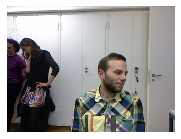

In [8]:
img = open_image(path/fname)
img.show()

In [9]:
ctr = np.genfromtxt(img2txt_name(fname),skip_header=3)
ctr

array([187.332 ,  40.3892, 893.135 ])

In [0]:
def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2,c1])

def get_ctr(f):
    ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
    return convert_biwi(ctr)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [11]:
get_ctr(fname)



tensor([263.9104, 428.5814])

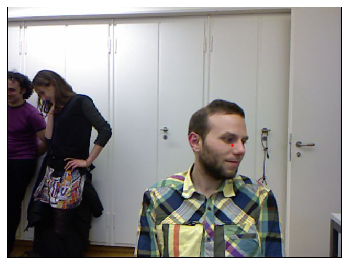

In [13]:
ctr = get_ctr(fname)
img.show(y=get_ip(img,ctr),figsize=(6,6))

In [0]:
data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name=='13')
        .label_from_func(get_ctr)
        .transform(get_transforms(),tfm_y=True,size=(120,160))
        .databunch().normalize(imagenet_stats))

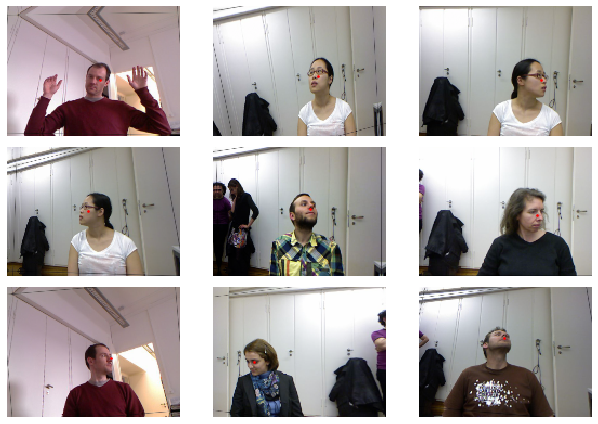

In [15]:
data.show_batch(rows=3,figsize=(9,6))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 264MB/s]


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


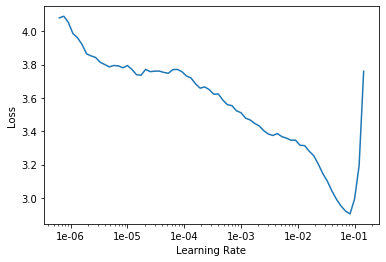

In [16]:
learn = cnn_learner(data,models.resnet34)
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-2

In [18]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,time
0,0.190575,0.005674,02:45
1,0.077904,0.007833,02:53
2,0.027359,0.004116,02:53
3,0.013365,0.002862,02:51
4,0.008778,0.002214,02:51


In [19]:
learn = create_cnn(data,models.resnet34)
learn.loss_func = MSELossFlat()

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


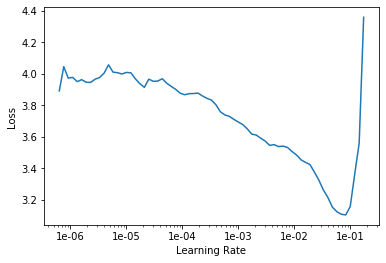

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
lr = 2e-2
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,time
0,0.120512,0.004259,02:49
1,0.043219,0.005468,02:50
2,0.014178,0.005120,02:49
3,0.008359,0.001383,02:50
4,0.006520,0.002520,02:50


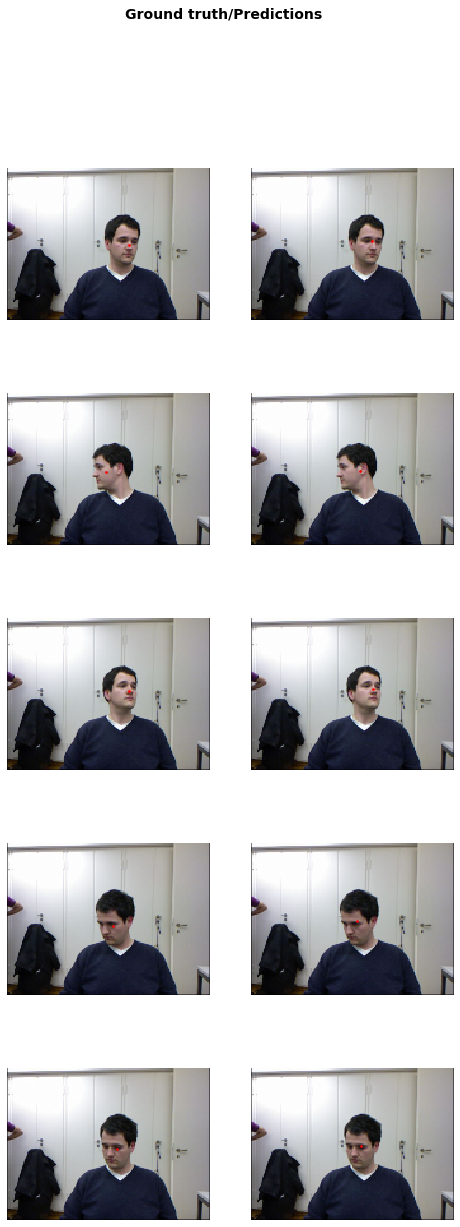

In [22]:
learn.show_results()